In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
fees0 = pd.read_csv("../../project_dataset/fees_data.csv")
cash0 = pd.read_csv('../../project_dataset/cash_request.csv')
merged0 = pd.read_csv("./merged_df.csv")

In [7]:
fees = fees0.copy()
cash = cash0.copy()
merged = merged0.copy()

In [8]:
cash.sample(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
4096,10066,100.0,rejected,2020-07-29 23:30:29.74767+00,2020-07-30 08:56:50.756102+00,NaN,2020-07-30 08:56:50.753781+00,3725.0,2020-09-07 22:00:00+00,NaN,NaN,instant,2020-08-05 23:30:29.746765+00,NaN,NaN,NaN
15576,11363,50.0,money_back,2020-08-07 13:27:32.20816+00,2020-12-18 13:10:36.256861+00,27243.0,2020-08-07 15:31:47.441155+00,NaN,2020-10-04 22:00:00+00,2020-08-17,2020-11-08 14:46:42.515447+00,regular,2020-08-14 13:27:32.207777+00,completed,2020-10-14 22:37:17.645216+00,2020-11-08 14:46:42.536082+00
18973,20590,100.0,money_back,2020-10-12 11:51:50.609089+00,2020-12-18 13:11:55.11954+00,68665.0,NaN,NaN,2020-10-31 12:50:00+00,2020-10-16,2020-10-18 00:57:13.299417+00,instant,2020-10-15 08:10:29.199666+00,NaN,NaN,NaN
23380,25045,100.0,money_back,2020-10-27 10:12:38.732849+00,2020-12-18 13:14:52.030496+00,90611.0,NaN,NaN,2020-11-14 23:00:00+00,2020-10-29,2020-11-19 23:00:00+00,instant,2020-10-27 10:12:51.374329+00,NaN,NaN,NaN
1624,2175,100.0,money_back,2020-05-26 07:20:22.444526+00,2020-06-11 22:34:58.585104+00,2993.0,2020-05-26 10:16:02.278527+00,NaN,2020-06-05 22:00:00+00,2020-05-29,2020-06-11 22:34:58.584859+00,regular,NaN,NaN,NaN,NaN


In [9]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [10]:
#Convertir fechas a typo date 
merged['created_at'] = pd.to_datetime(merged['created_at'])
merged['updated_at'] = pd.to_datetime(merged['updated_at'])
merged['moderated_at'] = pd.to_datetime(merged['moderated_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
merged['reimbursement_date']=pd.to_datetime(merged['reimbursement_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
merged['reco_last_update']=pd.to_datetime(merged['reco_last_update'])
merged['reco_creation'] = pd.to_datetime(merged['reco_creation'])
merged['cash_request_received_date'] = pd.to_datetime(merged['cash_request_received_date'])
merged['money_back_date'] = pd.to_datetime(merged['money_back_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
merged['send_at'] = pd.to_datetime(merged['send_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

**DATA CLEANING**

**User ID**

In [11]:
cash['user_id'].fillna(cash['deleted_account_id'], inplace=True)

merged['user_id'].fillna(merged['deleted_account_id'], inplace=True)

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_81072/848052514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cash['user_id'].fillna(cash['deleted_account_id'], inplace=True)
/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_81072/848052514.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

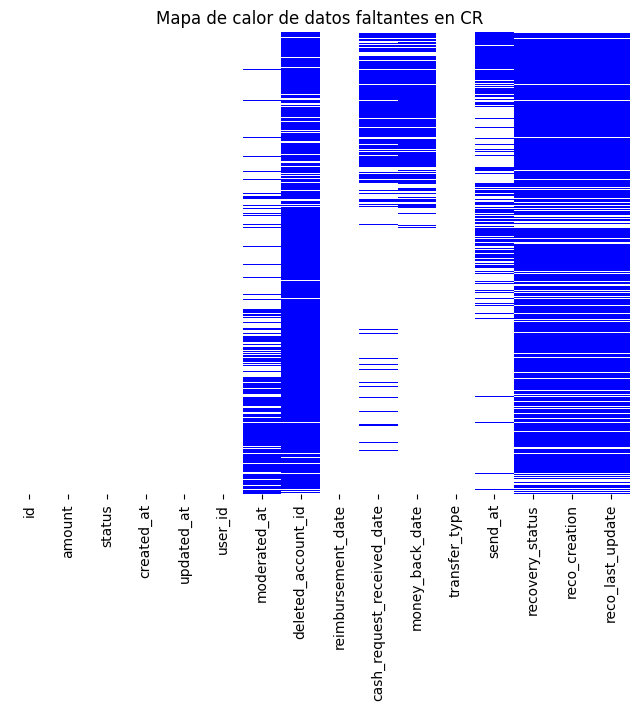

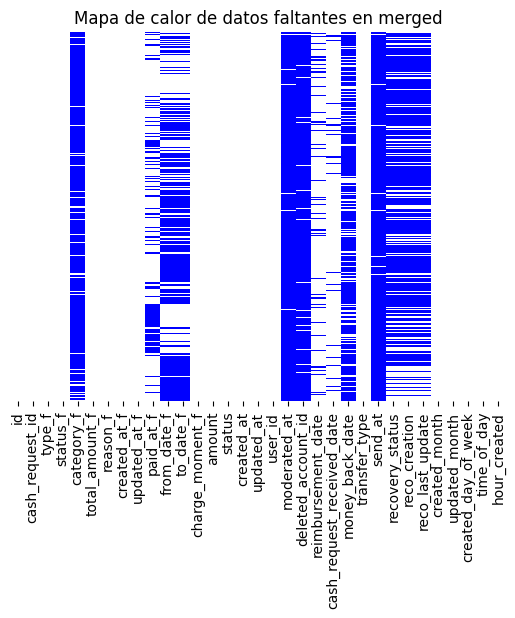

In [12]:
from matplotlib.colors import LinearSegmentedColormap
#Where user_id is missing, it is filled using the deleted_account_id to maintain record integrity:


# Define a custom color map
colors = ["white", "blue"]  # white for False values, bluee for True values
cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)
plt.figure(figsize=(8, 6))

# Crear un mapa de calor de los datos faltantes
sns.heatmap(cash.isnull(), cbar=False, yticklabels=False, cmap=cmap)
plt.title('Mapa de calor de datos faltantes en CR')
plt.show()
# Crear un mapa de calor de los datos faltantes
sns.heatmap(merged.isnull(), cbar=False, yticklabels=False, cmap=cmap)
plt.title('Mapa de calor de datos faltantes en merged')
plt.show()

**COHORT ANALYSIS**

Aqcuisition cohort analysis, behavior of the newly attracted people 

In [13]:
#Convertir fechas a typo date 
cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['updated_at'] = pd.to_datetime(cash['updated_at'])
cash['moderated_at'] = pd.to_datetime(cash['moderated_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['reimbursement_date']=pd.to_datetime(cash['reimbursement_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['reco_last_update']=pd.to_datetime(cash['reco_last_update'])
cash['reco_creation'] = pd.to_datetime(cash['reco_creation'])
cash['cash_request_received_date'] = pd.to_datetime(cash['cash_request_received_date'])
cash['money_back_date'] = pd.to_datetime(cash['money_back_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['send_at'] = pd.to_datetime(cash['send_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

In [14]:
cash['Cohorte'] = cash.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
cash.head(10)

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_81072/45113562.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['Cohorte'] = cash.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,Cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686.0,NaT,NaN,2020-06-05 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-05
5,2145,100.0,money_back,2020-05-23 20:58:55.129432+00:00,2020-07-06 03:36:03.023911+00:00,9489.0,NaT,NaN,2020-06-06 22:00:00+00:00,2020-05-26,NaT,regular,NaT,completed,2020-06-12 22:27:04.837525+00:00,2020-07-06 03:36:03.030904+00:00,2020-05
6,3512,100.0,rejected,2020-06-16 17:07:38.452652+00:00,2020-06-17 10:21:21.364746+00:00,14631.0,NaT,NaN,2020-07-11 23:51:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-06
7,654,100.0,rejected,2020-02-10 01:11:53.808270+00:00,2020-02-10 11:53:32.104131+00:00,309.0,NaT,309.0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-01
8,5672,100.0,canceled,2020-06-28 12:06:33.712840+00:00,2020-06-28 12:06:33.712853+00:00,2499.0,NaT,2499.0,2020-07-07 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-06
9,71,90.0,rejected,2019-12-10 19:51:23.911206+00:00,2019-12-12 15:06:11.192888+00:00,897.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12


In [15]:
#Calcular eel total de monto porr cohorte
cohort_data_mont = cash.groupby('Cohorte')['amount'].sum().reset_index()
cohort_data_mont

,Cohorte,amount
0,2019-11,232.0
1,2019-12,102126.0
2,2020-01,34354.0
3,2020-02,41029.0
4,2020-03,36134.0
5,2020-04,89364.0
6,2020-05,153980.0
7,2020-06,475016.0
8,2020-07,354741.0
9,2020-08,125335.0


In [16]:
cash['created_month'] = cash['created_at'].dt.to_period('M')
cash

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_81072/2640815875.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['created_month'] = cash['created_at'].dt.to_period('M')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,Cohorte,created_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686.0,NaT,NaN,2020-06-05 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-05,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681.0,NaT,NaN,2021-02-06 11:00:00+00:00,2020-10-13,NaT,instant,NaT,NaN,NaT,NaT,2020-06,2020-10
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00:00,30367.0,NaT,30367.0,2020-11-03 22:00:00+00:00,2020-10-28,NaT,instant,NaT,completed,2020-11-12 23:20:41.928788+00:00,2020-12-01 13:26:53.815504+00:00,2020-10,2020-10
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00:00,82122.0,NaT,NaN,2021-02-05 11:00:00+00:00,2020-10-21,NaT,instant,NaT,NaN,NaT,NaT,2020-10,2020-10
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00:00,64517.0,NaT,NaN,2021-02-05 11:00:00+00:00,2020-10-12,NaT,instant,NaT,NaN,NaT,NaT,2020-10,2020-10


In [17]:
#Clientes unicos por cohortee

cohort_size = cash.groupby(['Cohorte', 'created_month']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_size

,Cohorte,created_month,Num_Clientes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,680
79,2020-09,2020-11,20
80,2020-10,2020-10,4802
81,2020-10,2020-11,15


In [18]:
#Numeero de  clients unicos es cada cohorte een cada mes
cohort_sizes_monthly = cash.groupby(['Cohorte', 'created_month']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes_monthly

,Cohorte,created_month,Num_Clientes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,680
79,2020-09,2020-11,20
80,2020-10,2020-10,4802
81,2020-10,2020-11,15


In [19]:
#Cantidad dee solicitudes de edineero de cada cohort de cada mes 

cohort_cash_monthly = cash.groupby(['Cohorte', 'created_month']).agg(Num_Solicitudes=('user_id', 'count')).reset_index()
cohort_cash_monthly

,Cohorte,created_month,Num_Solicitudes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,727
79,2020-09,2020-11,20
80,2020-10,2020-10,5043
81,2020-10,2020-11,15


In [20]:
#La cantidad de clieentes een cada cohortee 
cohort_sizes_initial = cohort_sizes_monthly.groupby('Cohorte').first()
cohort_sizes_initial

,created_month,Num_Clientes
Cohorte,,
2019-11,2019-11,1
2019-12,2019-12,254
2020-01,2020-01,106
2020-02,2020-02,90
2020-03,2020-03,86
2020-04,2020-04,246
2020-05,2020-05,432
2020-06,2020-06,1540
2020-07,2020-07,1482


In [21]:
cohort_cash_initial = cohort_cash_monthly.groupby('Cohorte').first()
cohort_cash_initial

,created_month,Num_Solicitudes
Cohorte,,
2019-11,2019-11,1
2019-12,2019-12,288
2020-01,2020-01,117
2020-02,2020-02,97
2020-03,2020-03,99
2020-04,2020-04,264
2020-05,2020-05,478
2020-06,2020-06,1934
2020-07,2020-07,1996


In [22]:
#Calcular la tasa dee retncion de clieentes 
retencion = cohort_sizes_monthly.pivot(index='Cohorte', columns='created_month', values='Num_Clientes').div(cohort_sizes_initial['Num_Clientes'], axis=0)
retencion1 = retencion*100
retencion1

created_month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,100.0,100.0,NaN,NaN,NaN,100.000000,100.000000,NaN,NaN,100.000000,100.000000,100.000000,NaN
2019-12,NaN,100.0,35.433071,22.834646,26.771654,26.377953,29.527559,28.740157,23.228346,26.377953,16.929134,24.409449,0.393701
2020-01,NaN,NaN,100.000000,20.754717,15.094340,25.471698,25.471698,25.471698,26.415094,19.811321,18.867925,22.641509,0.943396
2020-02,NaN,NaN,NaN,100.000000,50.000000,46.666667,46.666667,43.333333,43.333333,40.000000,27.777778,37.777778,NaN
2020-03,NaN,NaN,NaN,NaN,100.000000,44.186047,43.023256,52.325581,41.860465,39.534884,33.720930,31.395349,1.162791
2020-04,NaN,NaN,NaN,NaN,NaN,100.000000,47.154472,49.593496,37.398374,32.520325,30.894309,24.796748,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,59.027778,50.694444,43.055556,34.027778,35.648148,0.925926
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,49.090909,48.246753,37.272727,36.753247,0.324675
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,47.435897,34.480432,35.964912,0.472335


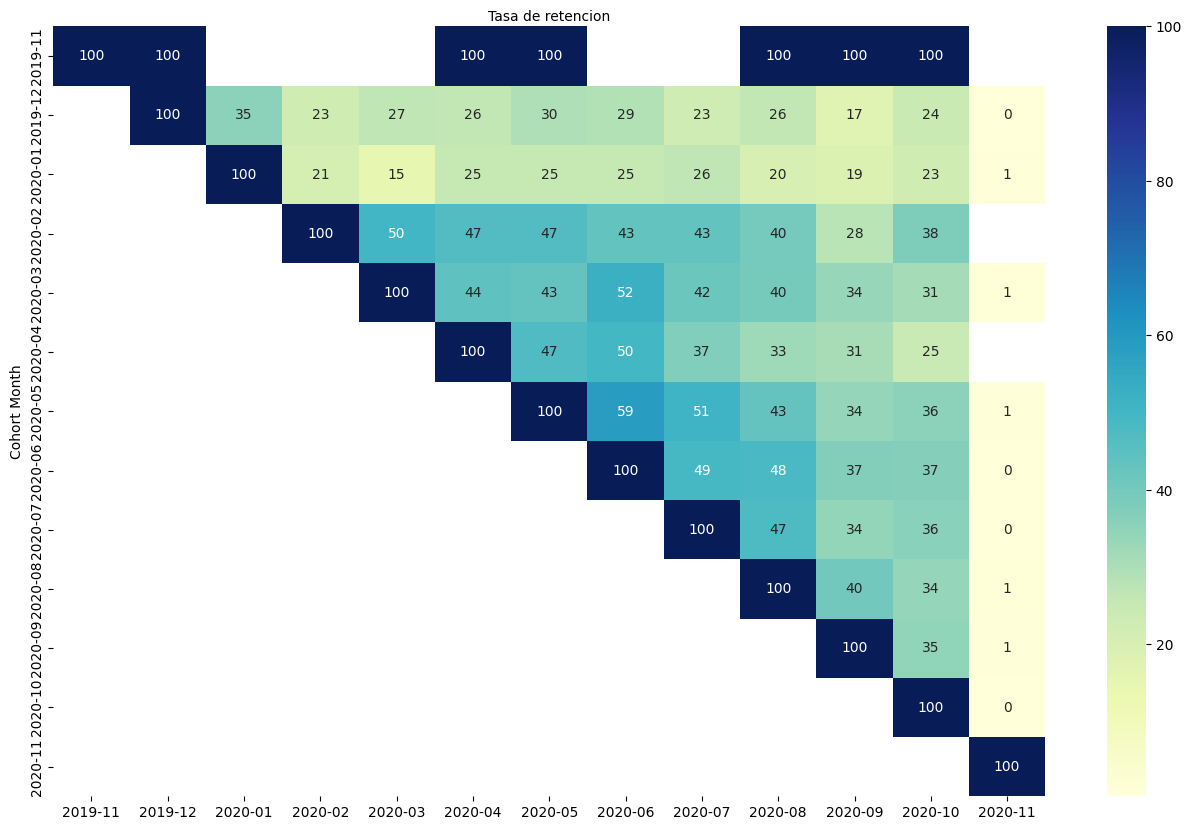

In [23]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
sns.heatmap(retencion1, annot = True, cmap="YlGnBu", fmt = '.0f')
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Tasa de retencion')
ax.xaxis.set_label_position('top')
plt.show()

In [24]:
#Defining  cohortes of the cashrequests which were charrgeed with fees
merged['Cohorte'] = merged.groupby('user_id')['created_at'].transform('min').dt.to_period('M')

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_81072/241471465.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged['Cohorte'] = merged.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


In [25]:
#Numeero de  clients unicos es cada cohorte een cada mes
cohort_sizes_monthly_merged = merged.groupby(['Cohorte', 'created_month']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes_monthly_merged

,Cohorte,created_month,Num_Clientes
0,2020-04,2020-04,1
1,2020-04,2020-06,1
2,2020-05,2020-05,96
3,2020-05,2020-06,15
4,2020-05,2020-07,22
5,2020-05,2020-08,36
6,2020-05,2020-09,22
7,2020-05,2020-10,39
8,2020-05,2020-11,1
9,2020-06,2020-06,675


In [26]:
cohort_amount = merged.groupby('Cohorte')['amount'].sum().reset_index()
cohort_amount

,Cohorte,amount
0,2020-04,500.0
1,2020-05,51821.0
2,2020-06,313918.0
3,2020-07,266000.0
4,2020-08,337273.0
5,2020-09,299848.0
6,2020-10,448299.0
7,2020-11,5510.0


In [27]:
merged['created_month'] = merged['created_at'].dt.to_period('M')
merged

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_81072/4176429150.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged['created_month'] = merged['created_at'].dt.to_period('M')


,id,cash_request_id,type_f,status_f,category_f,total_amount_f,reason_f,created_at_f,updated_at_f,paid_at_f,...,send_at,recovery_status,reco_creation,reco_last_update,created_month,updated_month,created_day_of_week,time_of_day,hour_created,Cohorte
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,...,NaT,pending,2020-10-11 22:52:52.274832+00:00,2020-12-20 22:40:42.556534+00:00,2020-09,2020-12,Monday,morning,10,2020-09
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,...,NaT,completed,2020-09-09 20:51:17.992852+00:00,2020-10-10 22:58:13.306027+00:00,2020-08,2020-12,Monday,afternoon,13,2020-06
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.432910+00:00,...,NaT,NaN,NaT,NaT,2020-10,2020-12,Friday,morning,10,2020-10
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00:00,...,NaT,NaN,NaT,NaT,2020-10,2020-12,Saturday,afternoon,15,2020-10
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00:00,...,NaT,completed,2020-10-24 22:43:13.278707+00:00,2020-11-02 14:45:20.333109+00:00,2020-10,2020-12,Tuesday,night,0,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00:00,2020-10-13 14:25:04.180490+00:00,2020-11-17 05:14:00.080854+00:00,...,NaT,pending,2020-11-21 22:21:53.124430+00:00,2020-11-21 22:21:57.858230+00:00,2020-10,2020-11,Saturday,night,6,2020-10
21053,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00:00,2020-10-31 15:24:18.680715+00:00,2020-12-16 07:10:54.697639+00:00,...,NaT,pending,2020-11-21 22:50:26.679591+00:00,2020-12-19 22:30:03.346628+00:00,2020-10,2020-12,Saturday,afternoon,15,2020-10
21054,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00:00,2020-10-27 17:28:51.749200+00:00,2020-11-18 04:35:42.915511+00:00,...,NaT,pending,2020-11-22 22:15:47.957828+00:00,2020-11-22 22:15:51.383283+00:00,2020-10,2020-11,Tuesday,evening,17,2020-10
21055,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00:00,2020-10-23 16:27:52.047486+00:00,2020-12-18 05:18:01.465317+00:00,...,NaT,pending,2020-11-25 22:43:52.728522+00:00,2020-12-23 22:42:25.184800+00:00,2020-10,2020-12,Friday,afternoon,16,2020-10


In [28]:
#Clientes unicos por cohortee

cohort_size_merged = merged.groupby(['Cohorte', 'created_month']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_size_merged

,Cohorte,created_month,Num_Clientes
0,2020-04,2020-04,1
1,2020-04,2020-06,1
2,2020-05,2020-05,96
3,2020-05,2020-06,15
4,2020-05,2020-07,22
5,2020-05,2020-08,36
6,2020-05,2020-09,22
7,2020-05,2020-10,39
8,2020-05,2020-11,1
9,2020-06,2020-06,675


In [29]:
#Cantidad dee solicitudes de edineero de cada cohort de cada mes 

cohort_cash_monthly_merged = merged.groupby(['Cohorte', 'created_month']).agg(Num_Solicitudes=('user_id', 'count')).reset_index()
cohort_cash_monthly_merged

,Cohorte,created_month,Num_Solicitudes
0,2020-04,2020-04,1
1,2020-04,2020-06,4
2,2020-05,2020-05,257
3,2020-05,2020-06,41
4,2020-05,2020-07,61
5,2020-05,2020-08,88
6,2020-05,2020-09,37
7,2020-05,2020-10,58
8,2020-05,2020-11,1
9,2020-06,2020-06,1700


In [30]:
#La cantidad de clieentes een cada cohortee 
cohort_sizes_initial_merged = cohort_sizes_monthly_merged.groupby('Cohorte').first()
cohort_sizes_initial_merged

,created_month,Num_Clientes
Cohorte,,
2020-04,2020-04,1
2020-05,2020-05,96
2020-06,2020-06,675
2020-07,2020-07,747
2020-08,2020-08,1146
2020-09,2020-09,1540
2020-10,2020-10,4871
2020-11,2020-11,74


In [31]:
#Calcular la tasa dee retncion de clieentes 
retencion_merged = cohort_sizes_monthly_merged.pivot(index='Cohorte', columns='created_month', values='Num_Clientes').div(cohort_sizes_initial_merged['Num_Clientes'], axis=0)
retencion_merged = retencion_merged*100
retencion_merged

created_month,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,
2020-04,100.0,NaN,100.000,NaN,NaN,NaN,NaN,NaN
2020-05,NaN,100.0,15.625,22.916667,37.500000,22.916667,40.625000,1.041667
2020-06,NaN,NaN,100.000,16.592593,36.296296,33.481481,35.851852,0.148148
2020-07,NaN,NaN,NaN,100.000000,30.522088,32.931727,37.884873,0.133869
2020-08,NaN,NaN,NaN,NaN,100.000000,44.589878,52.006981,0.872600
2020-09,NaN,NaN,NaN,NaN,NaN,100.000000,38.376623,0.909091
2020-10,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.246356
2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


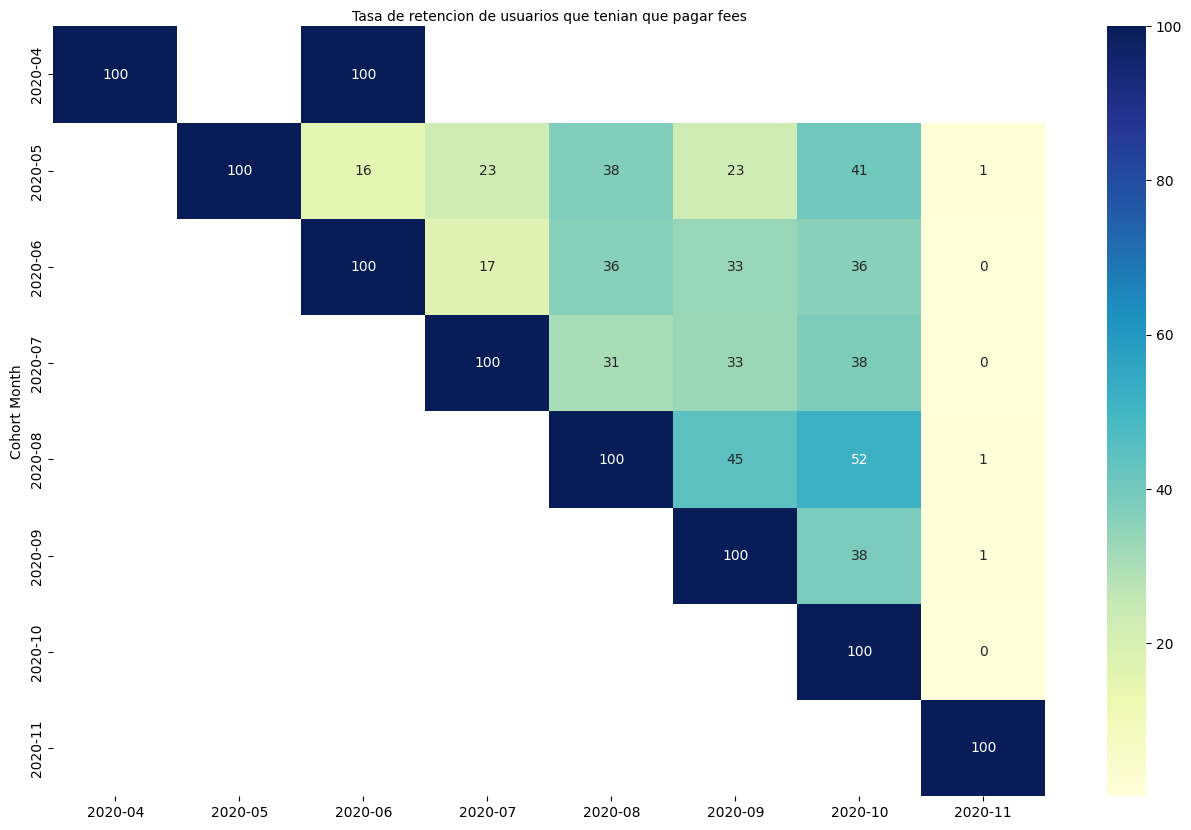

In [38]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
sns.heatmap(retencion_merged, annot = True, cmap="YlGnBu", fmt = '.0f')
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Tasa de retencion de usuarios que tenian que pagar fees')
ax.xaxis.set_label_position('top')
plt.show()

In [33]:
retencion_merged_amplified = retencion_merged.reindex(retencion.index, columns=retencion.columns, fill_value=0)
retencion_merged_amplified_filled = retencion_merged_amplified.fillna(0)
retencion_merged_amplified_filled

created_month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
retencion_filled=retencion.fillna(0)
retencion_filled

created_month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,1.0,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
2019-12,0.0,1.0,0.354331,0.228346,0.267717,0.263780,0.295276,0.287402,0.232283,0.263780,0.169291,0.244094,0.003937
2020-01,0.0,0.0,1.000000,0.207547,0.150943,0.254717,0.254717,0.254717,0.264151,0.198113,0.188679,0.226415,0.009434
2020-02,0.0,0.0,0.000000,1.000000,0.500000,0.466667,0.466667,0.433333,0.433333,0.400000,0.277778,0.377778,0.000000
2020-03,0.0,0.0,0.000000,0.000000,1.000000,0.441860,0.430233,0.523256,0.418605,0.395349,0.337209,0.313953,0.011628
2020-04,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.471545,0.495935,0.373984,0.325203,0.308943,0.247967,0.000000
2020-05,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.590278,0.506944,0.430556,0.340278,0.356481,0.009259
2020-06,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.490909,0.482468,0.372727,0.367532,0.003247
2020-07,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.474359,0.344804,0.359649,0.004723


In [35]:
difference = retencion_filled - retencion_merged_amplified_filled
difference = difference*100

difference

created_month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,100.0,100.0,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,0.000000
2019-12,0.0,100.0,35.433071,22.834646,26.771654,26.377953,29.527559,28.740157,23.228346,26.377953,16.929134,24.409449,0.393701
2020-01,0.0,0.0,100.000000,20.754717,15.094340,25.471698,25.471698,25.471698,26.415094,19.811321,18.867925,22.641509,0.943396
2020-02,0.0,0.0,0.000000,100.000000,50.000000,46.666667,46.666667,43.333333,43.333333,40.000000,27.777778,37.777778,0.000000
2020-03,0.0,0.0,0.000000,0.000000,100.000000,44.186047,43.023256,52.325581,41.860465,39.534884,33.720930,31.395349,1.162791
2020-04,0.0,0.0,0.000000,0.000000,0.000000,100.000000,47.154472,49.593496,37.398374,32.520325,30.894309,24.796748,0.000000
2020-05,0.0,0.0,0.000000,0.000000,0.000000,0.000000,100.000000,59.027778,50.694444,43.055556,34.027778,35.648148,0.925926
2020-06,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,49.090909,48.246753,37.272727,36.753247,0.324675
2020-07,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,47.435897,34.480432,35.964912,0.472335


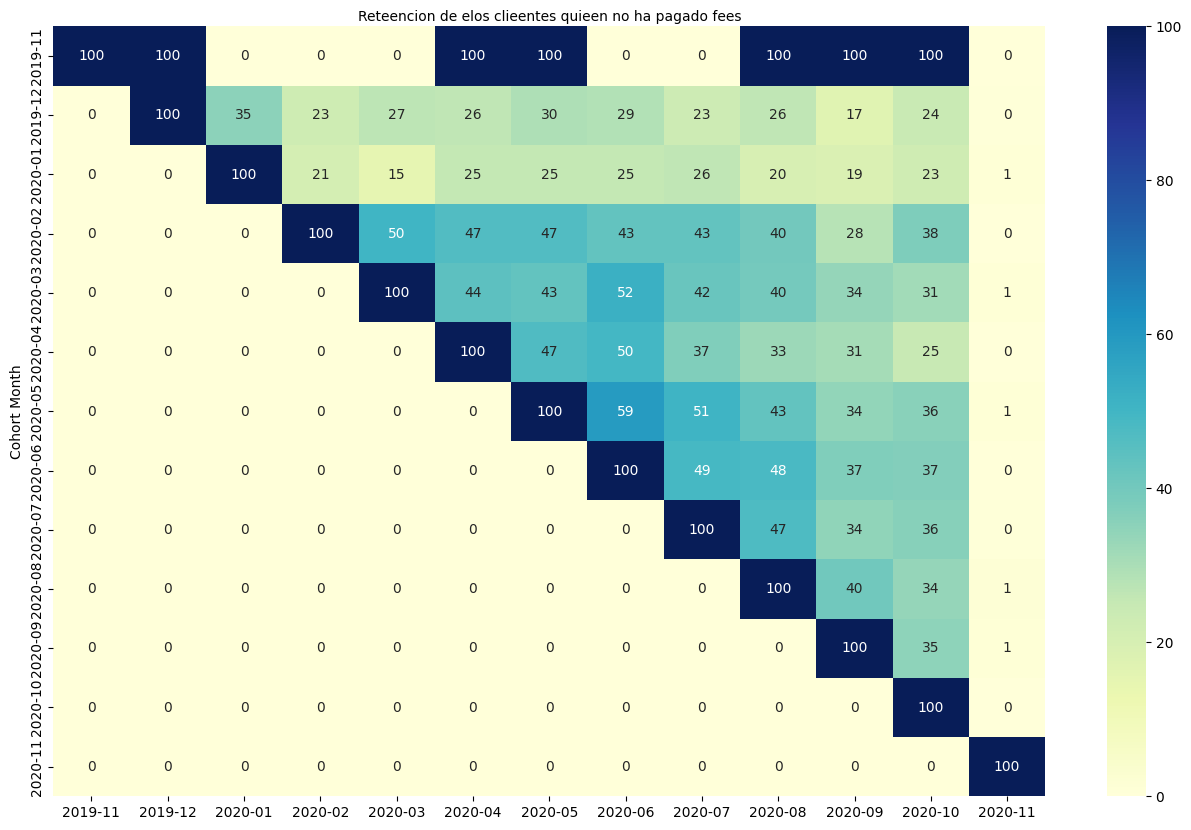

In [36]:
fig, ax = plt.subplots(1,1, figsize=(16,10))
sns.heatmap(difference, annot = True, cmap="YlGnBu", fmt = '.0f')
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Reteencion de elos clieentes quieen no ha pagado fees')
ax.xaxis.set_label_position('top')
plt.show()

In [37]:
merged['created_at_f'] = pd.to_datetime(merged['created_at_f'],  format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
merged['paid_at_f'] = pd.to_datetime(merged['paid_at_f'],  format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

# Calculate duration between created_at and paid_at
merged['reimburshemeent_time'] = merged['reimbursement_date'] - merged['created_at']

# Calculate difference between created_at_f and paid_at_f
merged['Fee_payment_time'] = merged['paid_at_f'] - merged['created_at_f']



TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects